# Classificação de Salários

## Projeto da disciplina SME0860 - Aprendizado de Máquina Aplicado a Problemas

### Membros

* Arthur Santorum Lorenzetto - arts.lorenzetto@usp.br - 12559465

* Gustavo Silva de Oliveira - gustavo.oliveira03@usp.br - 12567231

* Paloma Botto de Medeiros Serrão - palomabotto@usp.br - 12689641

* Pedro Henrique de Freitas Maçonetto - pedromaconetto@usp.br -12675419

### Professor
* André Carlos Ponce Leon - andre@icmc.usp.br

### Monitores
* Ana Letícia - analeticiagarcez@usp.br
* Gustavo - gustavo.moura.souza@usp.br
* Leonardo - leonardo.feltran@usp.br
* Luan - luanssouza@usp.br
* Milene - milene.santos@usp.br

## 1. Introdução


A coleta e análise de dados tornou-se uma ferramenta fundamental para empresas em diferentes setores, fornecendo informações para a tomada de decisão e o aprimoramento de processos. Nesse sentido, o presente notebook busca realizar uma análise em cima de dados coletados pela empresa Subsidy Inc, que coletou dados autenticados sobre salários individuais, parâmetros demográficos e alguns parâmetros financeiros. Para o problema proposto, serão 13 variáveis a serem trabalhadas, sendo uma delas o atributo alvo, dicotômico, indicando valores acima de 50 mil ou menor igual a este valor de salário anual.

Sendo assim, nesse problema, a ideia é indicar se um salário está acima de 50 mil ou menor igual a 50 mil por ano. Uma vez que o conjunto de dados possui 13 parâmetros, o objetivo final é tentar reduzir o número de variáveis a serem utilizadas, sem sacrificar de forma significativa a acurácia, e indicar da melhor maneira possível para a empresa se determinado indivíduo tem ou não a necessidade de subsídio.


## 2. Metodologia

Para a predição de salários, a metodologia a ser adotada seguirá um Projeto de Aprendizado de Máquina. Assim, o primeiro passo será a compreensão do problema e a obtenção dos dados necessários para a análise.

A seguir, será realizada a etapa de pré-processamento, na qual os dados serão limpos, tratados e normalizados. Isso inclui a remoção de valores ausentes, a identificação e tratamento de valores discrepantes, e a padronização dos dados. A partir desses dados preparados, será feita a análise exploratória, visando a identificação de padrões estatísticos iniciais.

Na sequência, a modelagem dos algoritmos de aprendizado de máquina será iniciada. Para a análise da predição de salários, será utilizado o aprendizado supervisionado, com algoritmos de classificação, a fim de compreender quais fatores têm maior influência na determinação dos salários. Serão testados diversos modelos para selecionar aquele com melhor desempenho.

Com os modelos treinados, será realizada a validação cruzada para avaliar a capacidade de generalização dos modelos. Além disso, serão utilizadas métricas para avaliar o desempenho dos modelos em relação às predições.

### Contextualização do Problema

* O quanto cada atributo influencia na categorização do salário?
* Há correlação entre as variáveis do problema?
* Quais atributos explicam melhor a predição da classe do salário?

## 3. Compreensão dos Dados

### Coleta de Dados

O conjunto de dados utilizado para a análise do problema está disponível no [Kaggle](https://www.kaggle.com/datasets/vardhansiramdasu/income?resource=download).


### Dicionário de dados

* **Idade** (*age*);
* **JobType**: Status de trabalho da pessoa, em qual setor ela atua;
* **Nível de Educação** (*EdType*);
* **Estado Civil** (*maritalstatus*);
* **Ocupação** (*occupation*): Tipo de trabalho que a pessoa faz, profissão da pessoa;
* **Relacionamento** (*relationship*): Papel familiar da pessoa no ambiente doméstico;
* **Raça** (*race*);
* **Gênero** (*gender*);
* **Ganho de capital** (*capitalgain*): Ganho de capital de uma pessoa baseado em seus investimentos;
* **Perda de capital** (*capitalloss*): Perda de capital de uma pessoa baseado em seus investimentos;
* **Horas por semana** (*hoursperweek*): Número de horas que uma pessoa trabalha por semana;
* **País de origem** (*nativecountry*);
* **Status do Salário** (*SalStat*): A variável de renda indicando em qual categoria o salário da pessoa se encaixa.

### Tipos das variáveis

* **Variáveis numéricas**:
    * Discretas:
        * age;
        * hoursperweek;
        * capitalgain;
        * capitalloss.



* **Variáveis qualitativas**:
    * Nominais:
        * JobType;      
        * EdType;       
        * maritalstatus;
        * occupation;   
        * relationship; 
        * race;         
        * gender;
        * nativecountry;
        * SalStat (atributo alvo).

## 4. Tratamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
# Lendo arquivo com os dados de Salário
df = pd.read_csv('https://raw.githubusercontent.com/ImagineDogs/Classificacao-de-Salarios/main/income.csv')
df.shape

(31978, 13)

In [3]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
# Temos no total 9 variáveis categóricas e 4 numéricas discretas
df.dtypes

age               int64
JobType          object
EdType           object
maritalstatus    object
occupation       object
relationship     object
race             object
gender           object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
SalStat          object
dtype: object

In [5]:
# Não Possuimos dados Faltantes
np.where(df.isna() == True)

(array([], dtype=int64), array([], dtype=int64))

In [6]:
percentage = df.loc[df['SalStat'] == ' greater than 50,000']['SalStat'].count()/df.shape[0]

print(f'{round(percentage*100,2)}% dos entrevistados ganham mais de 50 mil por ano \n{round((1-percentage)*100,2)}% dos entrevistados ganham menos ou igual a 50 mil por ano\n')

24.06% dos entrevistados ganham mais de 50 mil por ano 
75.94% dos entrevistados ganham menos ou igual a 50 mil por ano



## 5. Análise Exploratória dos Dados

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Armed-Forces'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Craft-repair'),
  Text(4, 0, ' Sales'),
  Text(5, 0, ' Exec-managerial'),
  Text(6, 0, ' Machine-op-inspct'),
  Text(7, 0, ' ?'),
  Text(8, 0, ' Transport-moving'),
  Text(9, 0, ' Farming-fishing'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Other-service'),
  Text(12, 0, ' Handlers-cleaners'),
  Text(13, 0, ' Protective-serv'),
  Text(14, 0, ' Priv-house-serv')])

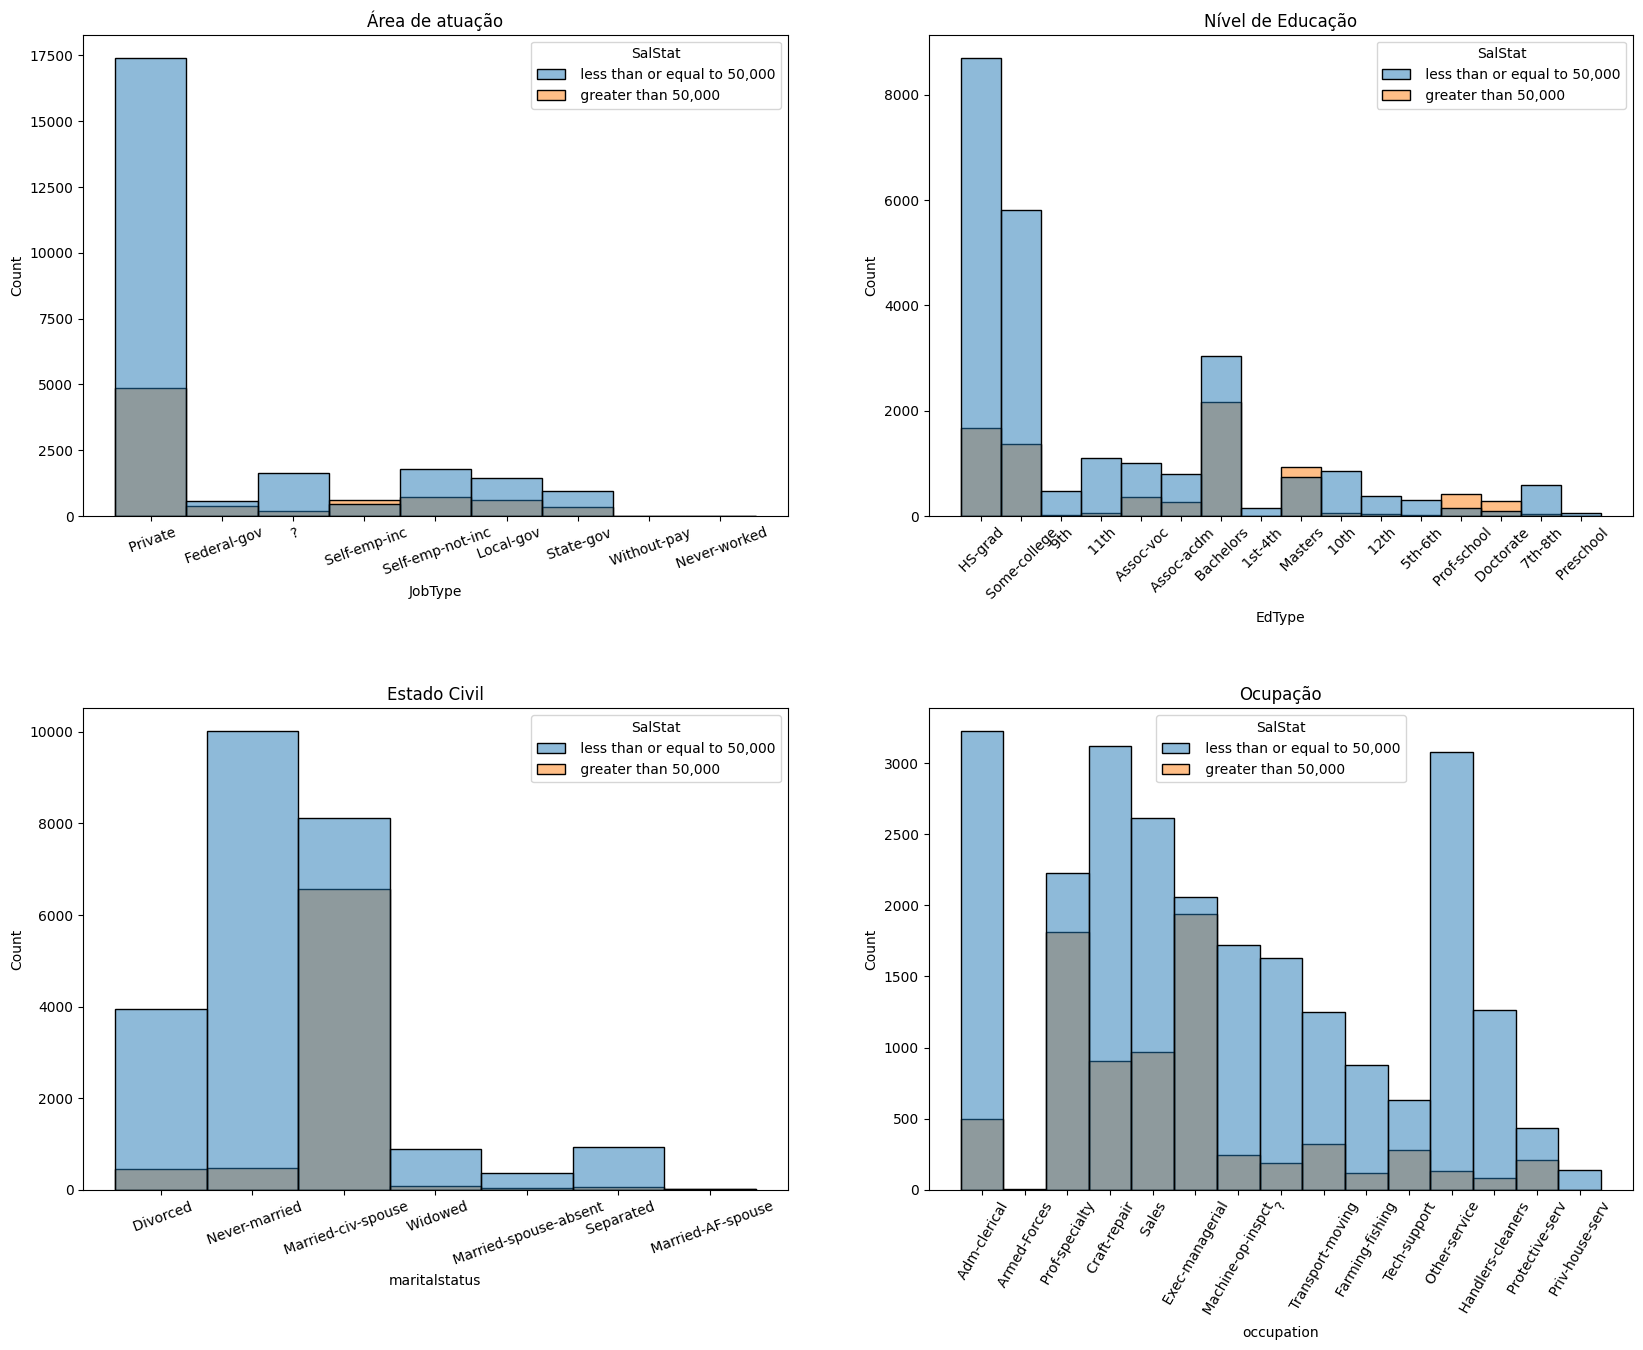

In [7]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (20, 15))
plt.subplots_adjust(hspace=0.4)

plt.subplot(2,2,1)
plt.title("Área de atuação")
fig = sns.histplot(data = df, x='JobType', hue='SalStat')
plt.xticks(rotation = 20) 


plt.subplot(2,2,2)
plt.title("Nível de Educação")
fig = sns.histplot(data = df, x='EdType', hue='SalStat')
plt.xticks(rotation = 45) 

plt.subplot(2,2,3)
plt.title("Estado Civil")
fig = sns.histplot(data = df, x='maritalstatus', hue='SalStat')
plt.xticks(rotation = 20) 

plt.subplot(2,2,4)
plt.title("Ocupação")
fig = sns.histplot(data = df, x='occupation', hue='SalStat')
plt.xticks(rotation = 60) 

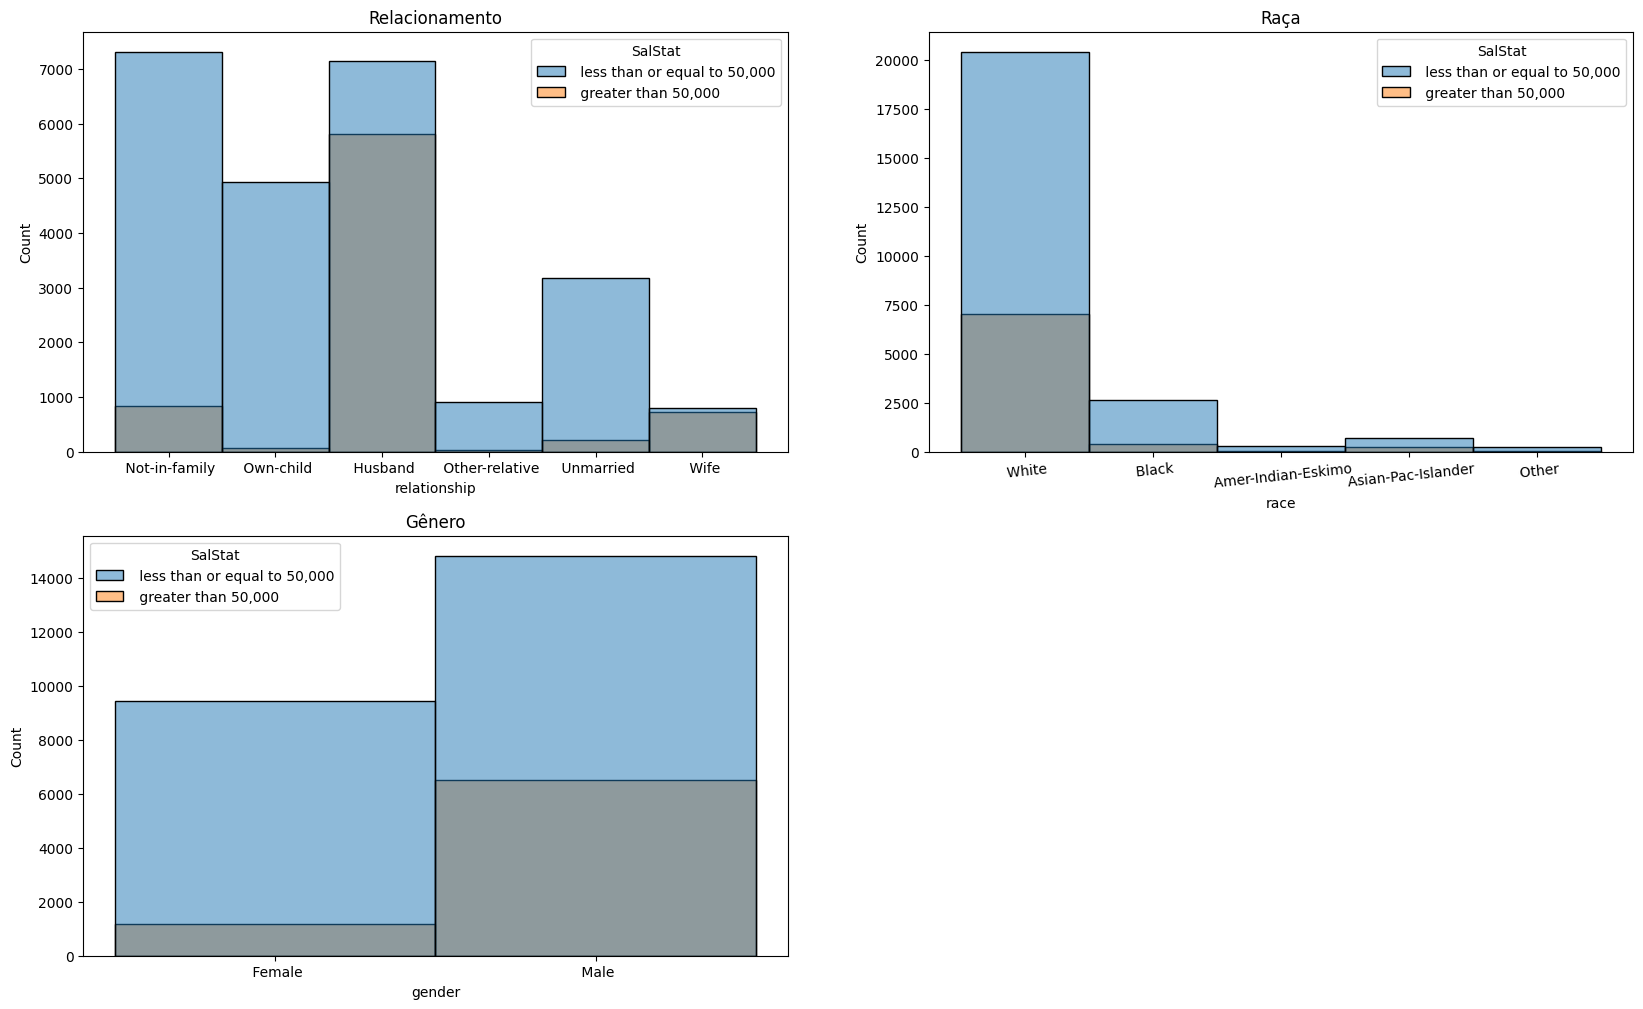

In [8]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Relacionamento")
fig = sns.histplot(data = df, x='relationship', hue='SalStat')
# fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.subplot(2,2,2)
plt.title("Raça")
fig = sns.histplot(data = df, x='race', hue='SalStat')
plt.xticks(rotation = 6) 
# fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.subplot(2,2,3)
plt.title("Gênero")
fig = sns.histplot(data = df, x='gender', hue='SalStat')
# fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

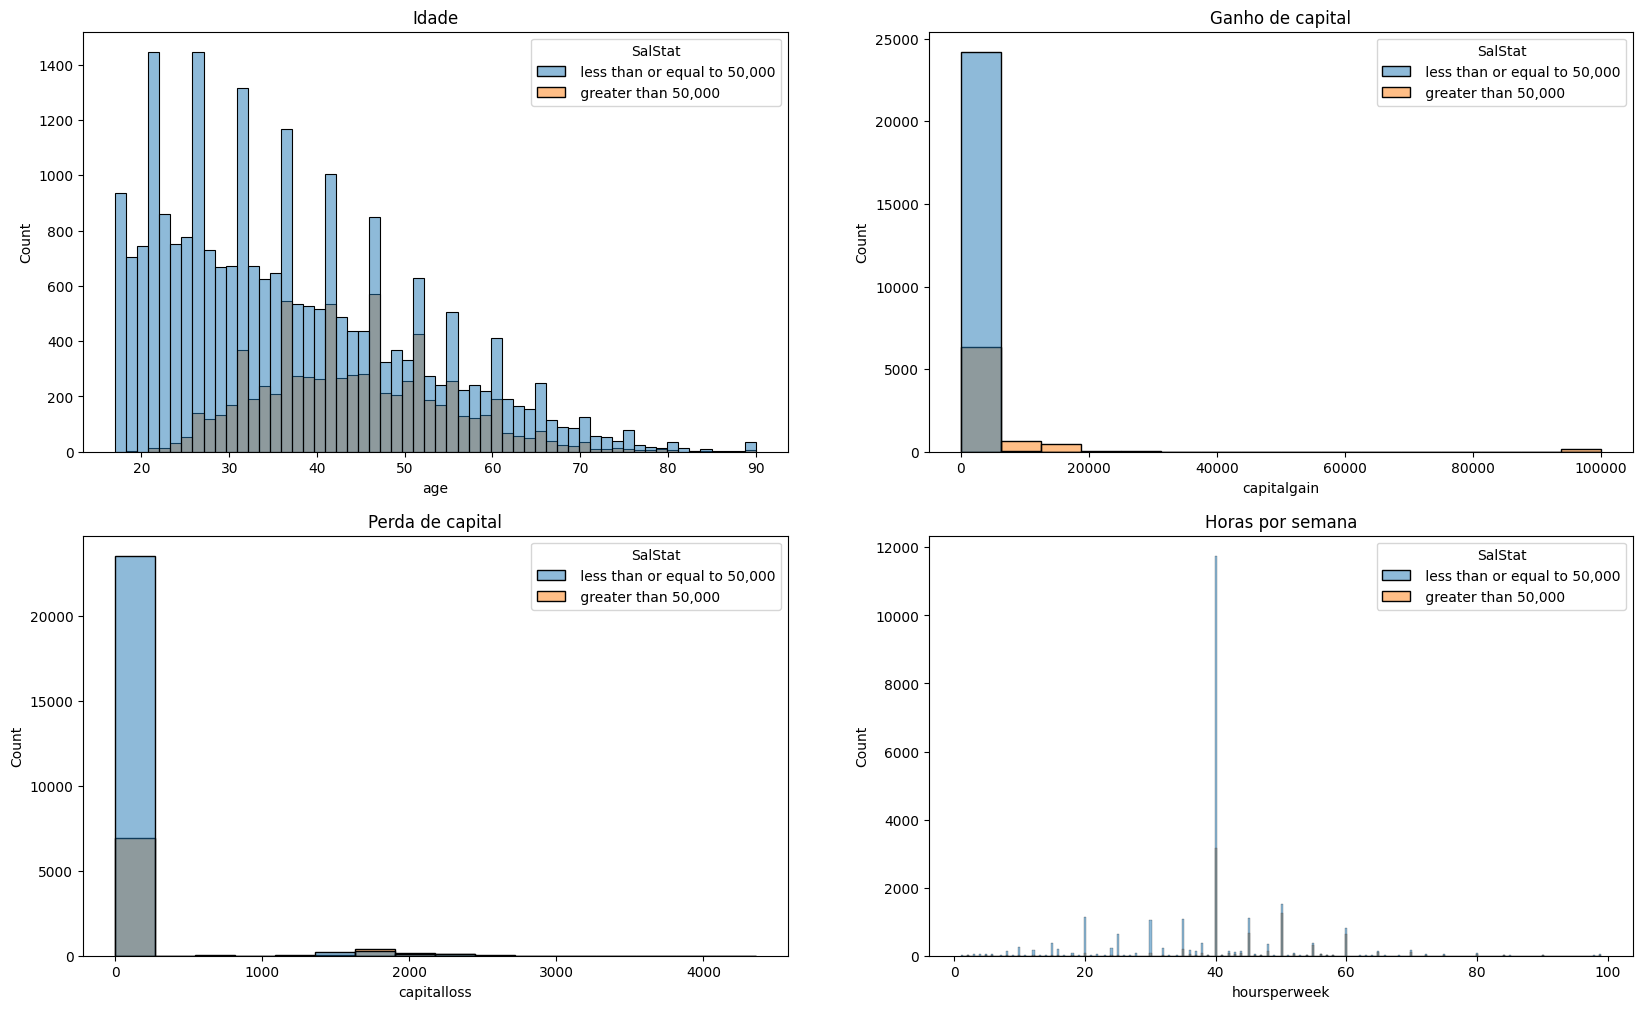

In [9]:
warnings.filterwarnings("ignore")

plt.figure(figsize = (20, 12))
plt.subplot(2,2,1)
plt.title("Idade")
sns.histplot(data = df, x='age', hue='SalStat')

plt.subplot(2,2,2)
plt.title("Ganho de capital")
fig = sns.histplot(data = df, x='capitalgain', hue='SalStat')
# fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.subplot(2,2,3)
plt.title("Perda de capital")
fig = sns.histplot(data = df, x='capitalloss', hue='SalStat')
# fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

plt.subplot(2,2,4)
plt.title("Horas por semana")
fig = sns.histplot(data = df, x='hoursperweek', hue='SalStat')
# fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

# plt.subplot(6,2,12)
# plt.title("País de origem")
# fig = sns.histplot(data = df, x='nativecountry', hue='SalStat')
# fig.set_xticklabels(fig.get_xticklabels(), rotation=45)



<Axes: title={'center': 'Status do Salário x Horas por semana'}, xlabel='SalStat', ylabel='hoursperweek'>

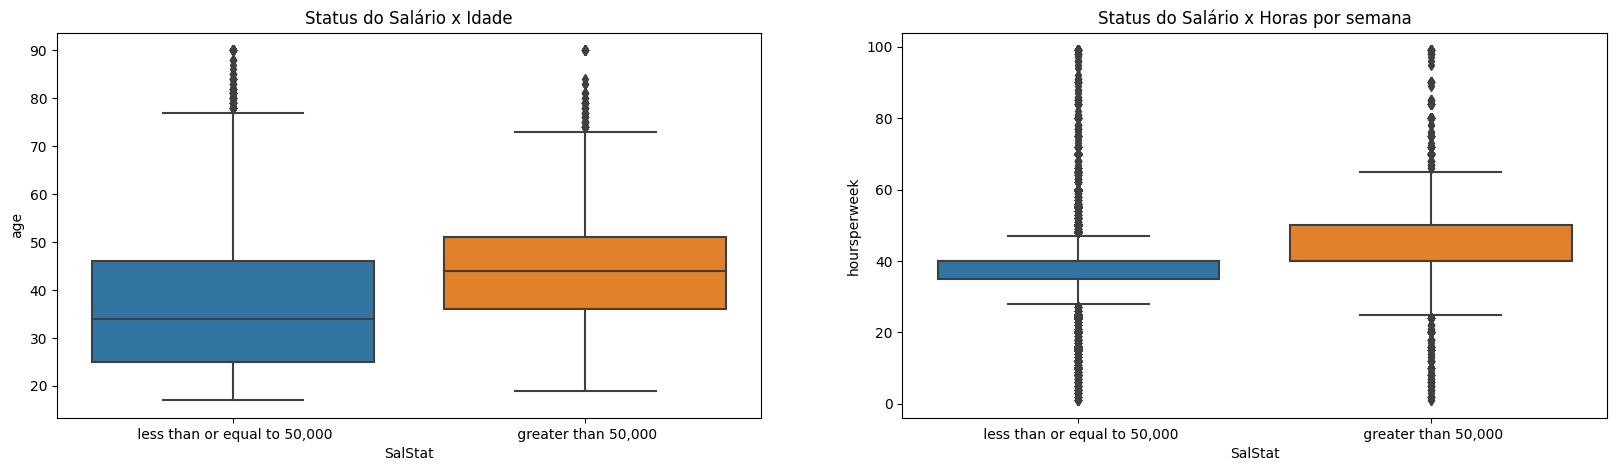

In [10]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.title("Status do Salário x Idade")
sns.boxplot(df, y = 'age', x='SalStat')
plt.subplot(1,2,2)
plt.title("Status do Salário x Horas por semana")
sns.boxplot(df, y = 'hoursperweek', x='SalStat')

In [11]:
df[['age','hoursperweek']].describe()

,age,hoursperweek
count,31978.000000,31978.000000
mean,38.579023,40.417850
std,13.662085,12.345285
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


## 6. Referências Bibliográficas

Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina - Faceli, Katti; Lorena, Ana Carolina; Gama, João; Carvalho, André Carlos Ponce de Leon Ferreira de